In [31]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

In [32]:
taxifares_train = pd.read_csv('train.csv', nrows=1000000)
taxifares_test = pd.read_csv('test.csv')

fares_train = taxifares_train.copy()
fares_test = taxifares_test.copy()

In [33]:
fares_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [34]:
print(fares_train.info())
print()
print(fares_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
key                  1000000 non-null object
fare_amount          1000000 non-null float64
pickup_datetime      1000000 non-null object
pickup_longitude     1000000 non-null float64
pickup_latitude      1000000 non-null float64
dropoff_longitude    999990 non-null float64
dropoff_latitude     999990 non-null float64
passenger_count      1000000 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 5

- There are some few missing data in the dropoff features.

In [35]:
fares_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


- some strange values here:                
    (1) the max passenger_count is 208 - most likely to be a wrong outlier              
    (2) the min passenger_count is 0 - maybe another outlier?              
    (3) New York latitude goes from 40.917577 (North Latitude) to 40.477399 (South Latitude) and its longitude goes from -73.700272 (East Longitude) to -74.259090 (West Longitude) - So there are some more outliers.                
    (4) There is at least one negative value in fare_amount - more outlier(s)             

In [36]:
fares_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [37]:
fares_test.quantile([0.001, 0.1, 0.9, 0.99, 0.999])

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0.001,-74.035754,40.633114,-74.176992,40.605838,1.0
0.100,-74.002999,40.720458,-74.003058,40.715636,1.0
0.900,-73.953533,40.779900,-73.947860,40.783823,4.0
0.990,-73.786084,40.806872,-73.804243,40.840864,6.0
0.999,-73.776653,40.950124,-73.733952,40.906926,6.0


The values in the test set are less dispersed and most of the rides were within the NY borders.

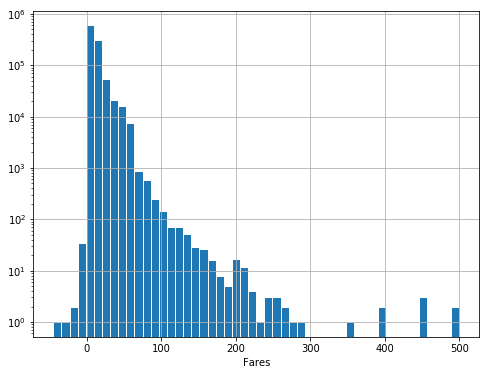

Skewness:  4.3524985939211485
Kurtosis:  57.15963983376025


In [38]:
_ = fares_train['fare_amount'].hist(bins=50, figsize=(8,6), edgecolor='w', log=True )
plt.xlabel('Fares')
plt.show()

print('Skewness: ', fares_train['fare_amount'].skew())
print('Kurtosis: ', fares_train['fare_amount'].kurtosis())

----
## Outliers and Feature Engineering

+ ##### Dropping latitude and longitude outliers
It seems that there are some data for taxi rides outside New York city in both training and testset (with both pickup and dropoff outside the city limits). It is not possible to drop all these values (as we need to predict their fares in the testset in order to score in the competition), so only rides that started and finished outside the city "borders" will be droped.

In [39]:
fares_train[(fares_train['pickup_latitude'] > 41.917577) & (abs(fares_train['dropoff_latitude']) > 40.917577)].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,9.814286,156.921340,245.542664,-206.481233,-153.356346,1.095238
std,4.032156,725.463039,653.599798,431.335631,676.874135,0.300793
min,2.600000,-90.239125,42.007640,-1718.117653,-2864.471003,1.000000
25%,7.000000,-72.866688,42.362817,-74.690003,42.348610,1.000000
50%,9.700000,-71.060340,42.634631,-71.082475,42.402118,1.000000
75%,12.200000,-67.528515,45.341914,-71.003917,44.416680,1.000000
max,17.500000,2522.271325,2621.628430,-62.784623,51.346519,2.000000


In [40]:
fares_train[((fares_train['pickup_latitude'] < 39.477399) & (fares_train['dropoff_latitude'] < 40.477399))].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,18527.000000,18527.000000,18527.000000,18527.000000,18527.000000,18527.000000
mean,11.805616,0.838531,-1.975873,0.785853,-2.047121,1.683111
std,12.294398,23.054770,13.575062,25.891784,22.283947,1.999926
min,-20.000000,-2986.242495,-880.627428,-3383.296608,-2559.748913,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,8.500000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,12.500000,0.000000,0.000000,0.000000,0.000000,2.000000
max,243.000000,40.850357,39.449402,40.851027,40.190564,208.000000


In [41]:
fares_train[(fares_train['pickup_longitude'] > -72.700272) & (fares_train['dropoff_longitude'] > -73.700272)].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000,18562.000000
mean,11.806860,0.995671,-1.827498,0.986960,-1.855858,1.686295
std,12.293678,6.960202,12.115282,7.020534,12.062482,2.001323
min,-20.000000,-72.188730,-74.016587,-73.622848,-74.035197,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,8.500000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,12.500000,0.000000,0.000000,0.000000,0.000000,2.000000
max,243.000000,40.850357,51.084373,40.851027,51.346519,208.000000


In [42]:
fares_train[((fares_train['pickup_longitude'] < -75.259090) & (fares_train['dropoff_longitude'] < -74.259090))].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,13.398684,-243.230185,10.688712,-179.390442,-22.234528,1.763158
std,13.635945,703.529646,150.856254,539.438215,425.241975,1.344342
min,2.500000,-3377.680935,-880.627428,-3383.296608,-2559.748913,1.000000
25%,4.600000,-77.875964,38.657093,-77.814649,39.141043,1.000000
50%,6.900000,-75.649970,40.646032,-75.714308,40.670984,1.000000
75%,16.900000,-75.359083,40.769249,-75.357484,40.831253,2.000000
max,50.000000,-75.289762,47.890090,-75.289486,314.794180,5.000000


In [43]:
fares_train = fares_train[~((fares_train['pickup_latitude'] > 41.917577) & (fares_train['dropoff_latitude'] > 40.917577))]
fares_train = fares_train[~((fares_train['pickup_latitude'] < 39.477399) & (fares_train['dropoff_latitude'] < 40.477399))]
fares_train = fares_train[~((fares_train['pickup_longitude'] > -72.700272) & (fares_train['dropoff_longitude'] > -73.700272))]
fares_train = fares_train[~((fares_train['pickup_longitude'] < -75.259090) & (fares_train['dropoff_longitude'] < -74.259090))]

fares_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,981381.000000,981381.000000,981381.000000,981371.000000,981371.000000,981381.000000
mean,11.339291,-73.911355,40.720373,-73.914329,40.712603,1.684906
std,9.768902,4.820213,4.687376,3.765274,5.017846,1.307733
min,-44.900000,-1452.988333,-3116.285383,-1718.117653,-3114.338567,0.000000
25%,6.000000,-73.992263,40.736512,-73.991565,40.735492,1.000000
50%,8.500000,-73.982071,40.753377,-73.980568,40.753836,1.000000
75%,12.500000,-73.968251,40.767557,-73.965232,40.768405,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,6.000000


In [44]:
# removing extreme values
fares_train = fares_train[~((abs(fares_train['pickup_latitude']) > 45.917577) | (abs(fares_train['pickup_latitude']) < 35.477399))]
fares_train = fares_train[~((abs(fares_train['dropoff_latitude']) > 45.917577) | (abs(fares_train['dropoff_latitude']) < 35.477399))]
fares_train = fares_train[~((abs(fares_train['pickup_longitude']) > 79.259090) | (abs(fares_train['pickup_longitude']) < 68.700272))]
fares_train = fares_train[~((abs(fares_train['dropoff_longitude']) > 79.259090) | (abs(fares_train['dropoff_longitude']) < 68.700272))]
fares_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,979457.000000,979457.000000,979457.000000,979448.000000,979448.000000,979457.000000
mean,11.332554,-73.975199,40.750948,-73.974294,40.751288,1.684942
std,9.749261,0.041240,0.032447,0.039214,0.035625,1.307645
min,-44.900000,-78.152138,38.754215,-76.678448,39.296307,0.000000
25%,6.000000,-73.992272,40.736567,-73.991574,40.735572,1.000000
50%,8.500000,-73.982082,40.753409,-73.980591,40.753868,1.000000
75%,12.500000,-73.968310,40.767579,-73.965319,40.768417,2.000000
max,500.000000,-69.062927,43.183332,-72.196091,44.600000,6.000000


---
+ ##### Distance between pickup and dropoff
1 degree of latitude is approximately 69 miles (111 km)        
1 degree of longitude at latitude 40° is approximately 53 miles (85 km)

In [45]:
for df in (fares_train, fares_test):
    df['dist_long (miles)'] = abs(df['pickup_longitude'] - df['dropoff_longitude']) * 53

In [46]:
for df in (fares_train, fares_test):
    df['dist_lat (miles)'] = abs(df['pickup_latitude'] - df['dropoff_latitude']) * 69

In [47]:
for df in (fares_train, fares_test):
    df['sum_distance'] = df['dist_long (miles)'] + df['dist_lat (miles)']
    df['min_distance'] = np.sqrt(df['dist_long (miles)']**2 + df['dist_lat (miles)']**2)

In [48]:
fares_train = fares_train.drop(['dist_lat (miles)'], axis=1)
fares_train = fares_train.drop(['dist_long (miles)'], axis=1)
fares_test = fares_test.drop(['dist_lat (miles)'], axis=1)
fares_test = fares_test.drop(['dist_long (miles)'], axis=1)


fares_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,sum_distance,min_distance
count,979457.000000,979457.000000,979457.000000,979448.000000,979448.000000,979457.000000,979448.000000,979448.000000
mean,11.332554,-73.975199,40.750948,-73.974294,40.751288,1.684942,2.695264,2.092824
std,9.749261,0.041240,0.032447,0.039214,0.035625,1.307645,3.410695,2.651486
min,-44.900000,-78.152138,38.754215,-76.678448,39.296307,0.000000,0.000000,0.000000
25%,6.000000,-73.992272,40.736567,-73.991574,40.735572,1.000000,0.998011,0.782663
50%,8.500000,-73.982082,40.753409,-73.980591,40.753868,1.000000,1.723684,1.342990
75%,12.500000,-73.968310,40.767579,-73.965319,40.768417,2.000000,3.147877,2.441513
max,500.000000,-69.062927,43.183332,-72.196091,44.600000,6.000000,345.542338,270.240245


In [49]:
fares_train = fares_train[fares_train['min_distance'] > 0]

---
+ ##### Dropping values < 2.5 in fare_amount
    The initial charge is $2.50.

In [50]:
fares_train[fares_train['fare_amount'] < 2.5].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,sum_distance,min_distance
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,-3.340678,-73.941912,40.752702,-73.945551,40.752538,1.440678,1.475491,1.155999
std,7.221806,0.087653,0.039079,0.093617,0.041182,1.054893,3.109645,2.494003
min,-44.900000,-74.077927,40.643498,-74.077919,40.641952,1.000000,0.000263,0.000263
25%,-3.000000,-73.990974,40.730503,-73.993973,40.732323,1.000000,0.005752,0.004693
50%,-2.500000,-73.979797,40.755985,-73.980347,40.750721,1.000000,0.191545,0.143863
75%,0.000000,-73.925300,40.770273,-73.937744,40.771947,1.000000,0.956183,0.728801
max,0.010000,-73.484480,40.927608,-73.484442,40.927605,6.000000,13.295148,10.351975


In [51]:
fares_train = fares_train[~(fares_train['fare_amount'] < 2.50)]

---
+ ##### Dropping unreal passenger_count
There are no charges for extra passengers or bags, so we may consider droping this feature later

In [52]:
fares_train[(fares_train['passenger_count'] > 10) | (fares_train['passenger_count'] == 0)].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,sum_distance,min_distance
count,3473.000000,3473.000000,3473.000000,3473.000000,3473.000000,3473.0,3473.000000,3473.000000
mean,8.719162,-73.978205,40.752459,-73.976534,40.752746,0.0,2.222383,1.725289
std,5.795975,0.027207,0.025280,0.028511,0.029363,0.0,2.138882,1.643311
min,2.500000,-74.031985,40.610338,-74.182600,40.575038,0.0,0.000159,0.000159
25%,5.300000,-73.992397,40.737600,-73.991878,40.736500,0.0,0.962800,0.754589
50%,7.300000,-73.982100,40.754600,-73.980987,40.754300,0.0,1.587200,1.230202
75%,10.500000,-73.969300,40.767900,-73.966800,40.768675,0.0,2.738400,2.121462
max,90.000000,-73.768418,40.976157,-73.725032,41.005684,0.0,23.356094,18.118907


In [53]:
fares_train = fares_train[~((fares_train['passenger_count'] > 10) | (fares_train['passenger_count'] == 0))]

---
+ ##### Droping rides with fare lower than the minimum that should be charged considering the ride distance
    50 cents for 1/5 mile

In [54]:
#minimum fare for ride distance

for df in (fares_train, fares_test):
    df['min_fare'] = df['min_distance'] * 0.5 / 0.2

fares_train = fares_train[fares_train.fare_amount > fares_train.min_fare]

fares_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,sum_distance,min_distance,min_fare
count,961163.000000,961163.000000,961163.000000,961163.000000,961163.000000,961163.000000,961163.000000,961163.000000,961163.000000
mean,11.361678,-73.975608,40.750871,-73.974612,40.751253,1.691301,2.680736,2.079712,5.199280
std,9.689027,0.034940,0.028230,0.035063,0.032144,1.306167,2.950560,2.233380,5.583449
min,2.500000,-75.235993,39.602837,-75.250500,39.583950,1.000000,0.000053,0.000053,0.000132
25%,6.000000,-73.992283,40.736617,-73.991577,40.735634,1.000000,1.015417,0.796424,1.991060
50%,8.500000,-73.982113,40.753423,-73.980633,40.753891,1.000000,1.736749,1.352855,3.382138
75%,12.500000,-73.968505,40.767552,-73.965547,40.768409,2.000000,3.151211,2.443949,6.109871
max,495.000000,-72.702870,41.696852,-72.196091,41.714633,6.000000,107.373131,88.468723,221.171808


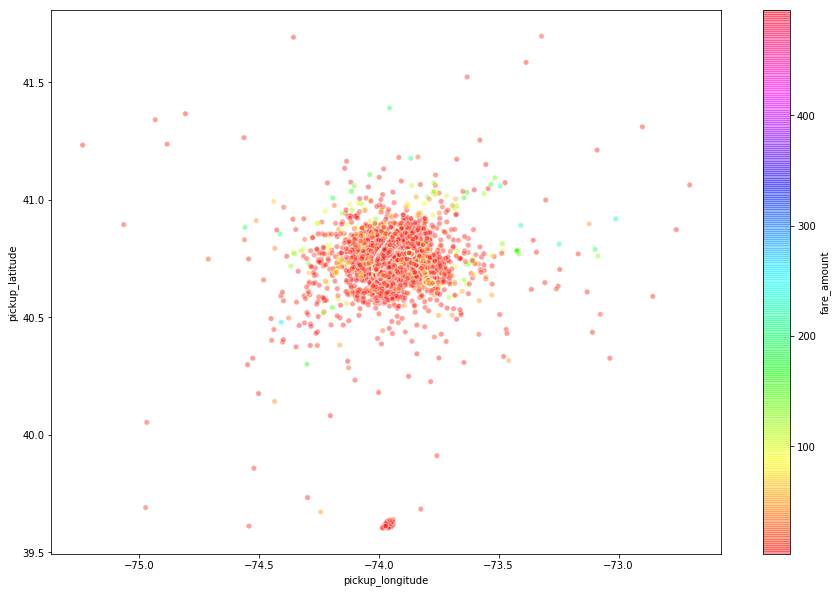

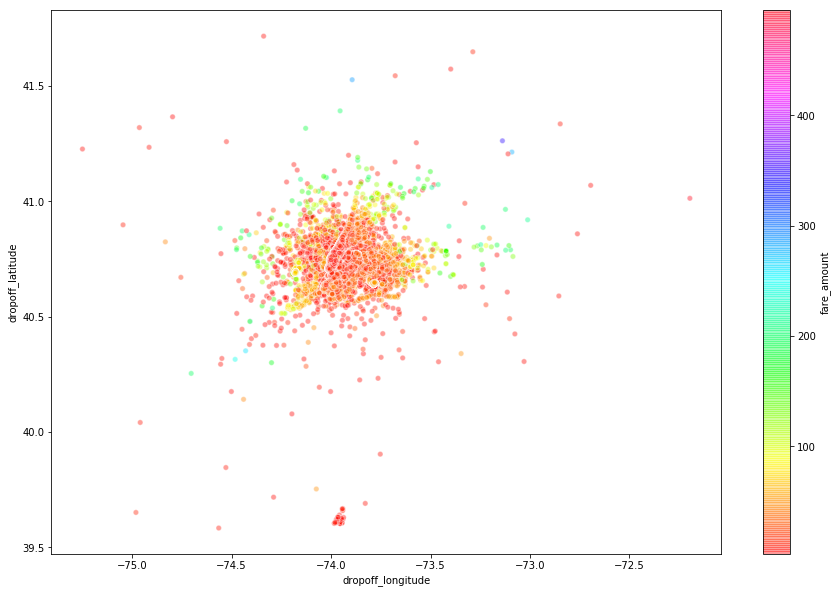

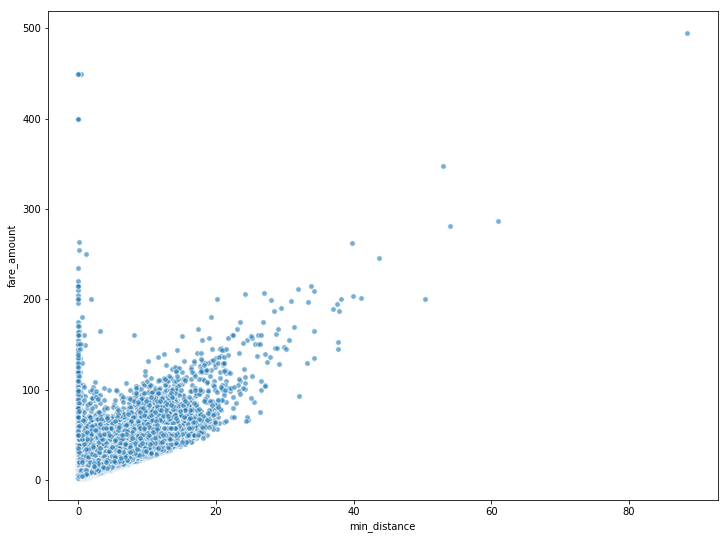

In [55]:
grid = fares_train.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude', edgecolor='w', alpha=0.4, 
                        s=30, c="fare_amount", cmap=plt.get_cmap("hsv"), colorbar=True, sharex=False, figsize=(15,10))
plt.show()

grid = fares_train.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude', edgecolor='w', alpha=0.4, 
                        s=30, c="fare_amount", cmap=plt.get_cmap("hsv"), colorbar=True, sharex=False, figsize=(15,10))
plt.show()

_ = fares_train.plot(kind='scatter', x='min_distance', y='fare_amount', edgecolor='w', alpha=0.6, s=30, figsize=(12,9))
plt.show()

----
* #### Droping samples with min_distance < 0.1 mile

In [56]:
fares_train[fares_train.min_distance < 0.1].describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,sum_distance,min_distance,min_fare
count,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000
mean,14.702892,-73.960306,40.745473,-73.960316,40.745464,1.597457,0.041982,0.032670,0.081676
std,24.449363,0.076343,0.050876,0.076340,0.050870,1.259919,0.040727,0.031402,0.078505
min,2.500000,-74.558173,39.607644,-74.558167,39.607698,1.000000,0.000053,0.000053,0.000132
25%,2.500000,-73.991771,40.728984,-73.991832,40.729050,1.000000,0.004244,0.003352,0.008380
50%,4.500000,-73.978707,40.751933,-73.978708,40.751928,1.000000,0.029232,0.022783,0.056957
75%,13.500000,-73.954052,40.766513,-73.953990,40.766523,2.000000,0.072976,0.057523,0.143808
max,450.000000,-73.011752,41.391042,-73.011777,41.391042,6.000000,0.140960,0.099935,0.249839


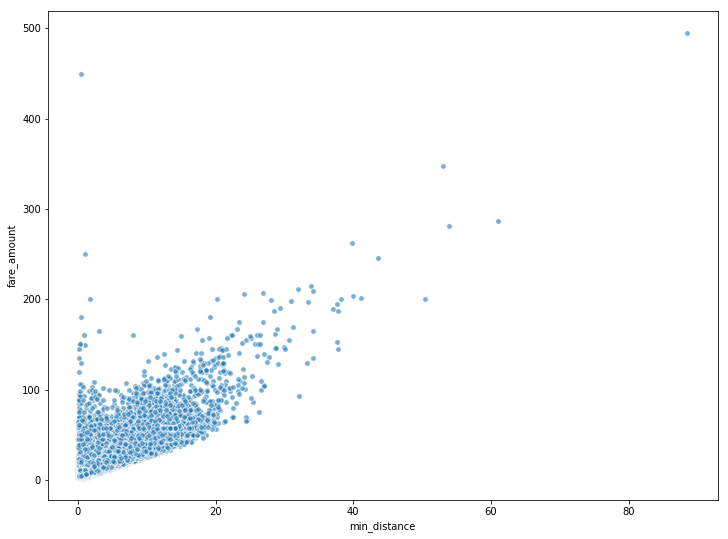

In [57]:
fares_train = fares_train[fares_train.min_distance >= 0.1]

_ = fares_train.plot(kind='scatter', x='min_distance', y='fare_amount', edgecolor='w', alpha=0.6, s=30, figsize=(12,9))
plt.show()

---------
+ ##### Pickupdatetime from object to datetime

In [58]:
for df in (fares_train, fares_test):
    df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])

fares_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953770 entries, 0 to 999999
Data columns (total 11 columns):
key                  953770 non-null object
fare_amount          953770 non-null float64
pickup_datetime      953770 non-null datetime64[ns]
pickup_longitude     953770 non-null float64
pickup_latitude      953770 non-null float64
dropoff_longitude    953770 non-null float64
dropoff_latitude     953770 non-null float64
passenger_count      953770 non-null int64
sum_distance         953770 non-null float64
min_distance         953770 non-null float64
min_fare             953770 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 87.3+ MB


In [59]:
#converting to Eastern Standard Time

for df in (fares_train, fares_test):
    df['pickup_time (EST)'] = df['pickup_datetime'].dt.tz_localize('utc').dt.tz_convert('US/Eastern')

In [60]:
for df in (fares_train, fares_test):
    df['year'] = df['pickup_time (EST)'].dt.year
    df['month'] = df['pickup_time (EST)'].dt.month
    df['day'] = df['pickup_time (EST)'].dt.day
    df['dayofweek'] = df['pickup_time (EST)'].dt.dayofweek
    df['hour'] = df['pickup_time (EST)'].dt.hour
    df['minute'] = df['pickup_time (EST)'].dt.minute

In [61]:
fares_train.sample(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,sum_distance,min_distance,min_fare,pickup_time (EST),year,month,day,dayofweek,hour,minute
660893,2013-01-03 08:19:38.0000001,5.50,2013-01-03 08:19:38,-73.990084,40.757532,-73.981548,40.761178,1,0.703982,0.517651,1.294127,2013-01-03 03:19:38-05:00,2013,1,3,3,3,19
380153,2014-05-14 16:21:36.0000004,18.50,2014-05-14 16:21:36,-74.011495,40.709547,-73.983020,40.698711,1,2.256859,1.684233,4.210582,2014-05-14 12:21:36-04:00,2014,5,14,2,12,21
153198,2014-11-07 23:57:14.0000003,45.50,2014-11-07 23:57:14,-73.788173,40.647507,-73.960918,40.660085,1,10.023367,9.196528,22.991320,2014-11-07 18:57:14-05:00,2014,11,7,4,18,57
939906,2011-08-03 06:50:07.0000001,5.70,2011-08-03 06:50:07,-73.981886,40.762336,-73.980905,40.774573,1,0.896346,0.845952,2.114881,2011-08-03 02:50:07-04:00,2011,8,3,2,2,50
351188,2013-03-08 12:54:40.0000001,34.83,2013-03-08 12:54:40,-73.982844,40.755109,-73.861887,40.768484,1,7.333596,6.476808,16.192020,2013-03-08 07:54:40-05:00,2013,3,8,4,7,54


In [62]:
for df in (fares_train, fares_test):
    df['is_rush_hour'] = ((df['hour'].isin([16, 17, 18, 19])) & 
                          (df['dayofweek'].isin([0,1,2,3,4]))).map({True:1, False:0})

In [63]:
for df in (fares_train, fares_test):
    df['night_shift'] = (df['hour'].isin([20,21,22,23,0,1,2,3,4,5])).map({True:1, False:0})

In [64]:
fares_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,sum_distance,min_distance,min_fare,year,month,day,dayofweek,hour,minute,is_rush_hour,night_shift
count,953770.000000,953770.000000,953770.000000,953770.000000,953770.000000,953770.000000,953770.000000,953770.000000,953770.000000,953770.000000,953770.000000,953770.000000,953770.000000,953770.000000,953770.000000,953770.000000,953770.000000
mean,11.335779,-73.975727,40.750913,-73.974723,40.751298,1.692028,2.701189,2.095579,5.238949,2011.749775,6.271743,15.707494,2.983174,11.815316,29.564129,0.158091,0.278920
std,9.480759,0.034399,0.027979,0.034528,0.031952,1.306493,2.952775,2.234705,5.586763,1.867461,3.439291,8.685176,1.905970,5.833882,17.324812,0.364826,0.448469
min,2.500000,-75.235993,39.602837,-75.250500,39.583950,1.000000,0.101863,0.100025,0.250062,2008.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992285,40.736657,-73.991576,40.735685,1.000000,1.029562,0.807226,2.018065,2010.000000,3.000000,8.000000,1.000000,7.000000,15.000000,0.000000,0.000000
50%,8.500000,-73.982125,40.753435,-73.980642,40.753905,1.000000,1.750655,1.363636,3.409091,2012.000000,6.000000,16.000000,3.000000,12.000000,30.000000,0.000000,0.000000
75%,12.500000,-73.968580,40.767560,-73.965627,40.768417,2.000000,3.170007,2.457709,6.144272,2013.000000,9.000000,23.000000,5.000000,17.000000,45.000000,0.000000,1.000000
max,495.000000,-72.702870,41.696852,-72.196091,41.714633,6.000000,107.373131,88.468723,221.171808,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000,1.000000,1.000000


-----------------
+ **Median Absolute Deviation (MAD)** - Univariate
https://dipot.ulb.ac.be/dspace/bitstream/2013/139499/1/Leys_MAD_final-libre.pdf

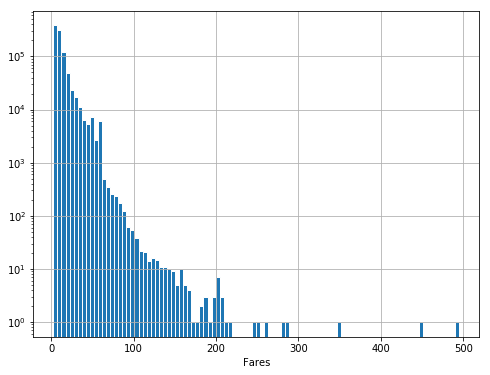

Skewness:  3.6971476530151954
Kurtosis:  34.63013136456048


In [65]:
grid = fares_train['fare_amount'].hist(bins=100, figsize=(8,6), edgecolor='w', log=True )
plt.xlabel('Fares')
plt.show()

print('Skewness: ', fares_train['fare_amount'].skew())
print('Kurtosis: ', fares_train['fare_amount'].kurtosis())

In [66]:
fare_amount = (fares_train['fare_amount'].copy())

mean = np.mean(fare_amount)
std = np.std(fare_amount)

fare_amount_stdardized = (fare_amount - mean)/std

# Q(0.75)
b= 1 / fare_amount_stdardized.quantile(0.75)
b

8.143431083685234

In [67]:
median = np.median(fare_amount)
MAD = b * np.median(abs(fare_amount - median))

# decision criterion: x is an outliet when x > median + 3*MAD or x < median-3*median 
superior_lim = median + 3 * MAD
inferior_lim = median - 3 * MAD

print(median)
print(superior_lim)
print(inferior_lim)

8.5
81.7908797531671
-64.7908797531671


In [68]:
# MAD outliers
mad_outliers = fares_train[fares_train.fare_amount > superior_lim]
mad_outliers.shape

(610, 20)

In [69]:
# dataset without outliers
train_outliers = fares_train[fares_train.fare_amount < superior_lim].copy()
train_outliers.shape

(953160, 20)

+ ##### Expected price based on miles

In [70]:
#There is a 30-cent Improvement Surcharge. 
#There is a daily 50-cent surcharge from 8pm to 6am.
#There is a $1 surcharge from 4pm to 8pm on weekdays, excluding holidays.

for df in (fares_train, fares_test, train_outliers):
    df['min_expected_fare'] = df['min_fare'] + 0.3 + 2.5
    df.loc[df['is_rush_hour'] == 1, 'min_expected_fare'] = df['min_expected_fare'] + 1.0
    df.loc[df['night_shift'] == 1, 'min_expected_fare'] = df['min_expected_fare'] + 0.5

fares_train.sample(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,sum_distance,min_distance,min_fare,pickup_time (EST),year,month,day,dayofweek,hour,minute,is_rush_hour,night_shift,min_expected_fare
906153,2012-11-21 09:20:37.0000005,5.5,2012-11-21 09:20:37,-74.003120,40.738925,-73.994045,40.741211,1,0.638709,0.506179,1.265447,2012-11-21 04:20:37-05:00,2012,11,21,2,4,20,0,1,4.565447
52076,2009-10-30 18:58:00.00000017,14.1,2009-10-30 18:58:00,-73.973590,40.755697,-73.915692,40.772513,1,4.228898,3.280636,8.201591,2009-10-30 14:58:00-04:00,2009,10,30,4,14,58,0,0,11.001591
143297,2012-06-18 07:06:59.0000002,4.1,2012-06-18 07:06:59,-73.964092,40.792629,-73.955857,40.787892,1,0.763308,0.545276,1.363190,2012-06-18 03:06:59-04:00,2012,6,18,0,3,6,0,1,4.663190
225209,2011-05-07 17:15:00.000000140,8.9,2011-05-07 17:15:00,-73.989862,40.757122,-73.984762,40.737123,1,1.650231,1.406155,3.515387,2011-05-07 13:15:00-04:00,2011,5,7,5,13,15,0,0,6.315387
198640,2014-07-31 04:55:00.0000008,52.0,2014-07-31 04:55:00,-73.977903,40.761822,-73.787710,40.647415,1,17.974312,12.803420,32.008550,2014-07-31 00:55:00-04:00,2014,7,31,3,0,55,0,1,35.308550


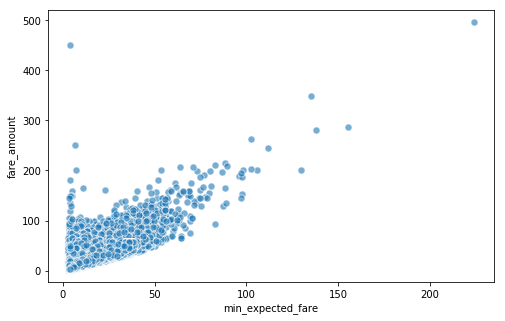

In [71]:
grid = fares_train.plot(kind='scatter', x='min_expected_fare', y='fare_amount', edgecolor='w', alpha=0.6, s=50, figsize=(8,5))

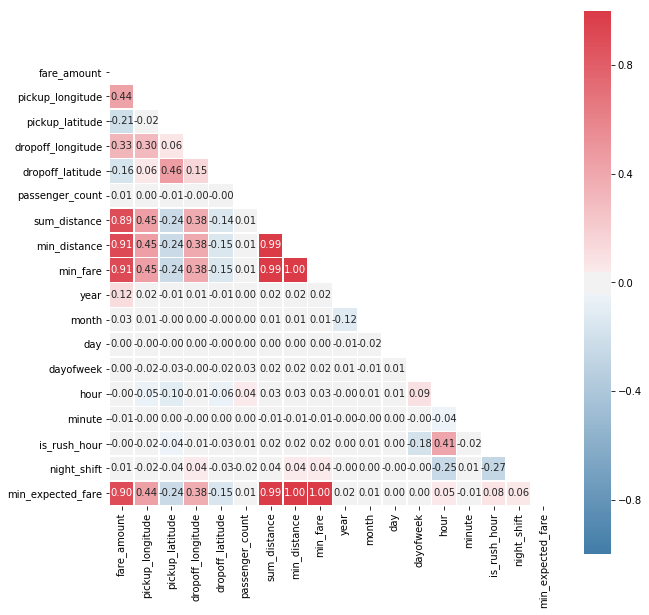

In [72]:
corr = fares_train.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(corr, mask=mask, square=True, annot=True, fmt='.2f', cmap=cmap, vmin=-1, center=0, linewidths=.5)
plt.show()

In [73]:
fares_train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'sum_distance', 'min_distance', 'min_fare',
       'pickup_time (EST)', 'year', 'month', 'day', 'dayofweek', 'hour',
       'minute', 'is_rush_hour', 'night_shift', 'min_expected_fare'],
      dtype='object')

In [74]:
print(fares_train.isnull().sum())
print()
print(fares_test.isnull().sum())
print()
print(train_outliers.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
sum_distance         0
min_distance         0
min_fare             0
pickup_time (EST)    0
year                 0
month                0
day                  0
dayofweek            0
hour                 0
minute               0
is_rush_hour         0
night_shift          0
min_expected_fare    0
dtype: int64

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
sum_distance         0
min_distance         0
min_fare             0
pickup_time (EST)    0
year                 0
month                0
day                  0
dayofweek            0
hour                 0
minute               0
is_rush_hour         0
night_shift          0
min_expected_fare    0
dtype: int64

key                  0
fare_a

In [75]:
columns_to_keep1 = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'min_distance',
                   'is_rush_hour', 'night_shift', 'min_expected_fare']
columns_to_keep2 = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'min_distance',
                   'is_rush_hour', 'night_shift']
columns_to_keep3 = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
                   'is_rush_hour', 'night_shift', 'min_expected_fare']

----
## Training model

In [76]:
y_train = fares_train['fare_amount'].copy()
y_train_out = train_outliers['fare_amount'].copy()

X_train = fares_train[columns_to_keep1]
X_train_out = train_outliers[columns_to_keep1]
X_test = fares_test[columns_to_keep1]

X_train.shape, y_train.shape, X_train_out.shape, y_train_out.shape, X_test.shape

((953770, 8), (953770,), (953160, 8), (953160,), (9914, 8))

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
np.random.seed(87)

randforest = RandomForestRegressor()

scores = cross_val_score(randforest, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print('X_train')
print('---')
print()
print('RMSE scores: ', rmse_scores)
print('RMSE mean: {:.4f}'.format(np.mean(rmse_scores)))
print('RMSE std: {:.4f}'.format(np.std(rmse_scores)))


X_train
---

RMSE scores:  [3.41950482 3.36953956 3.76335202 3.44105494 3.33149973 3.45378633
 3.42116786 3.46241439 3.46070198 3.39066703]
RMSE mean: 3.4514
RMSE std: 0.1115


In [78]:
scores = cross_val_score(randforest, X_train_out, y_train_out, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print('X_train_out')
print('---')
print()
print('RMSE scores: ', rmse_scores)
print('RMSE mean: {:.4f}'.format(np.mean(rmse_scores)))
print('RMSE std: {:.4f}'.format(np.std(rmse_scores)))


X_train_out
---

RMSE scores:  [3.1919931  3.19099054 3.23958701 3.2115346  3.183388   3.25189777
 3.27856798 3.23123237 3.2283677  3.18513788]
RMSE mean: 3.2193
RMSE std: 0.0305


In [79]:
y_train2 = fares_train['fare_amount'].copy()
y_train_out2 = train_outliers['fare_amount'].copy()

X_train2 = fares_train[columns_to_keep2]
X_train_out2 = train_outliers[columns_to_keep2]
X_test2 = fares_test[columns_to_keep2]

X_train.shape, y_train.shape, X_train_out.shape, y_train_out.shape, X_test.shape

((953770, 8), (953770,), (953160, 8), (953160,), (9914, 8))

In [80]:
scores = cross_val_score(randforest, X_train2, y_train2, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print('X_train2')
print('---')
print()
print('RMSE scores: ', rmse_scores)
print('RMSE mean: {:.4f}'.format(np.mean(rmse_scores)))
print('RMSE std: {:.4f}'.format(np.std(rmse_scores)))

X_train2
---

RMSE scores:  [3.44530163 3.37151263 3.79755532 3.44536028 3.34080401 3.44783157
 3.44377862 3.45790122 3.43672654 3.34717085]
RMSE mean: 3.4534
RMSE std: 0.1223


In [81]:
scores = cross_val_score(randforest, X_train_out2, y_train_out2, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print('X_train_out2')
print('---')
print()
print('RMSE scores: ', rmse_scores)
print('RMSE mean: {:.4f}'.format(np.mean(rmse_scores)))
print('RMSE std: {:.4f}'.format(np.std(rmse_scores)))


X_train_out2
---

RMSE scores:  [3.18219878 3.18820344 3.24268397 3.20212997 3.1871659  3.24600492
 3.26516772 3.23155731 3.22878642 3.1796955 ]
RMSE mean: 3.2154
RMSE std: 0.0295


In [82]:
y_train3 = fares_train['fare_amount'].copy()
y_train_out3 = train_outliers['fare_amount'].copy()

X_train3 = fares_train[columns_to_keep3]
X_train_out3 = train_outliers[columns_to_keep3]
X_test3 = fares_test[columns_to_keep3]

X_train3.shape, y_train3.shape, X_train_out3.shape, y_train_out3.shape, X_test3.shape

((953770, 7), (953770,), (953160, 7), (953160,), (9914, 7))

In [83]:
scores = cross_val_score(randforest, X_train3, y_train3, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print('X_train3')
print('---')
print()
print('RMSE scores: ', rmse_scores)
print('RMSE mean: {:.4f}'.format(np.mean(rmse_scores)))
print('RMSE std: {:.4f}'.format(np.std(rmse_scores)))

X_train3
---

RMSE scores:  [3.4384658  3.3798684  3.75897897 3.47918901 3.34216415 3.43075552
 3.45702506 3.40565145 3.45356004 3.38168183]
RMSE mean: 3.4527
RMSE std: 0.1095


In [84]:
scores = cross_val_score(randforest, X_train_out3, y_train_out3, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print('X_train_out3')
print('---')
print()
print('RMSE scores: ', rmse_scores)
print('RMSE mean: {:.4f}'.format(np.mean(rmse_scores)))
print('RMSE std: {:.4f}'.format(np.std(rmse_scores)))


X_train_out3
---

RMSE scores:  [3.20188002 3.1935136  3.25330491 3.22153089 3.19983444 3.24871259
 3.27085098 3.22690557 3.21691718 3.18617245]
RMSE mean: 3.2220
RMSE std: 0.0267


+ #### Model predictions

X_train_out
---


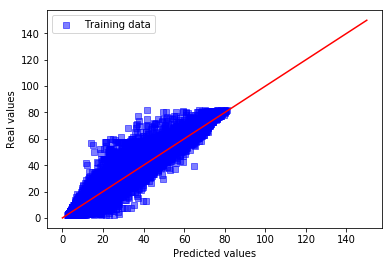

(9914, 2)

In [86]:
print('X_train_out')
print('---')

randforest.fit(X_train_out, y_train_out)
y_predicted_train = randforest.predict(X_train_out)

plt.scatter(y_predicted_train, y_train_out, c = "blue", marker = "s", alpha=0.5, label = "Training data")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 150], [0, 150], c = "red")
plt.show()


final_prediction = (randforest.predict(X_test))

submission = pd.DataFrame({'key': fares_test['key'],
                           'fare_amount': final_prediction})

submission.to_csv('TaxiFare_RandomForest_Xtrainout1.csv', index=False)
submission.shape

X_train
---


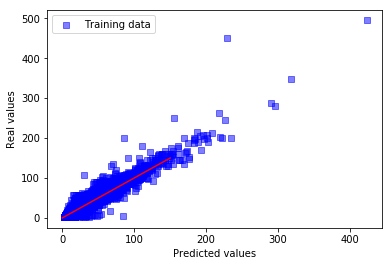

(9914, 2)

In [89]:
print('X_train')
print('---')

randforest.fit(X_train, y_train)
y_predicted_train = (randforest.predict(X_train))

plt.scatter(y_predicted_train, y_train, c = "blue", marker = "s", alpha=0.5, label = "Training data")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 150], [0, 150], c = "red")
plt.show()


final_prediction = (randforest.predict(X_test))

submission = pd.DataFrame({'key': fares_test['key'],
                           'fare_amount': final_prediction})

submission.to_csv('TaxiFare_RandomForest_Xtrain1.csv', index=False)
submission.shape